# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
data = pd.read_csv('Data/globalterrorismdb_0718dist.csv',encoding='latin1')
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
data.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

### We don't need all the columns so we select only the important ones

In [5]:
data = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
                      'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [6]:
data.shape

(181691, 18)

In [7]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [9]:
data.describe(include='all')

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181256,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181053,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2855,12,36673,NaN,NaN,9,NaN,NaN,86005,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


# Destructive Feature of Data

In [10]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


# DATA VISUALISATION

### Number of Terrorist Activities each Year

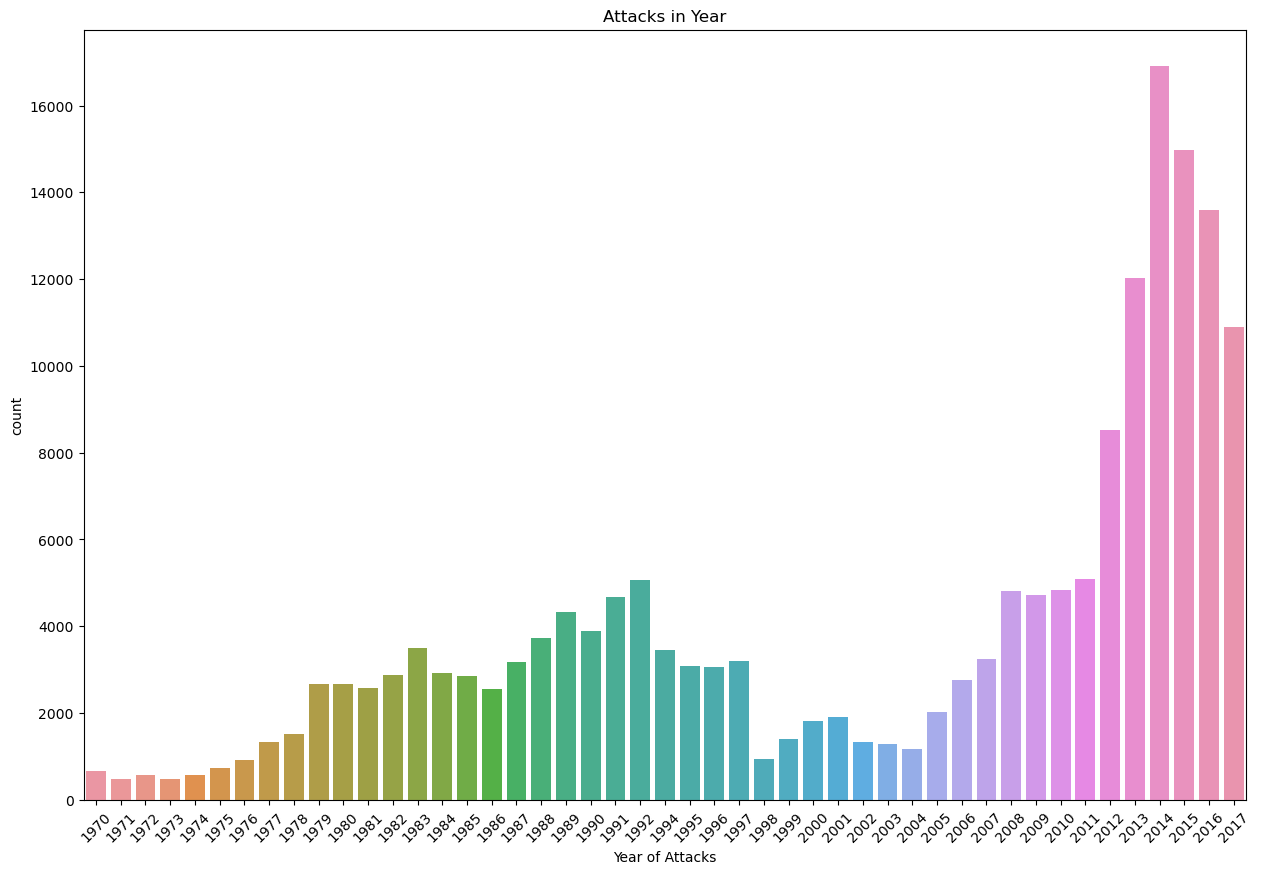

In [11]:
x_year = data['Year'].unique()
y_year = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attacks in Year")
plt.xlabel("Year of Attacks")
plt.ylabel("Number of Attacks each year")
plt.xticks(rotation = 45)
sns.barplot(x = x_year, y = y_year)
plt.show()

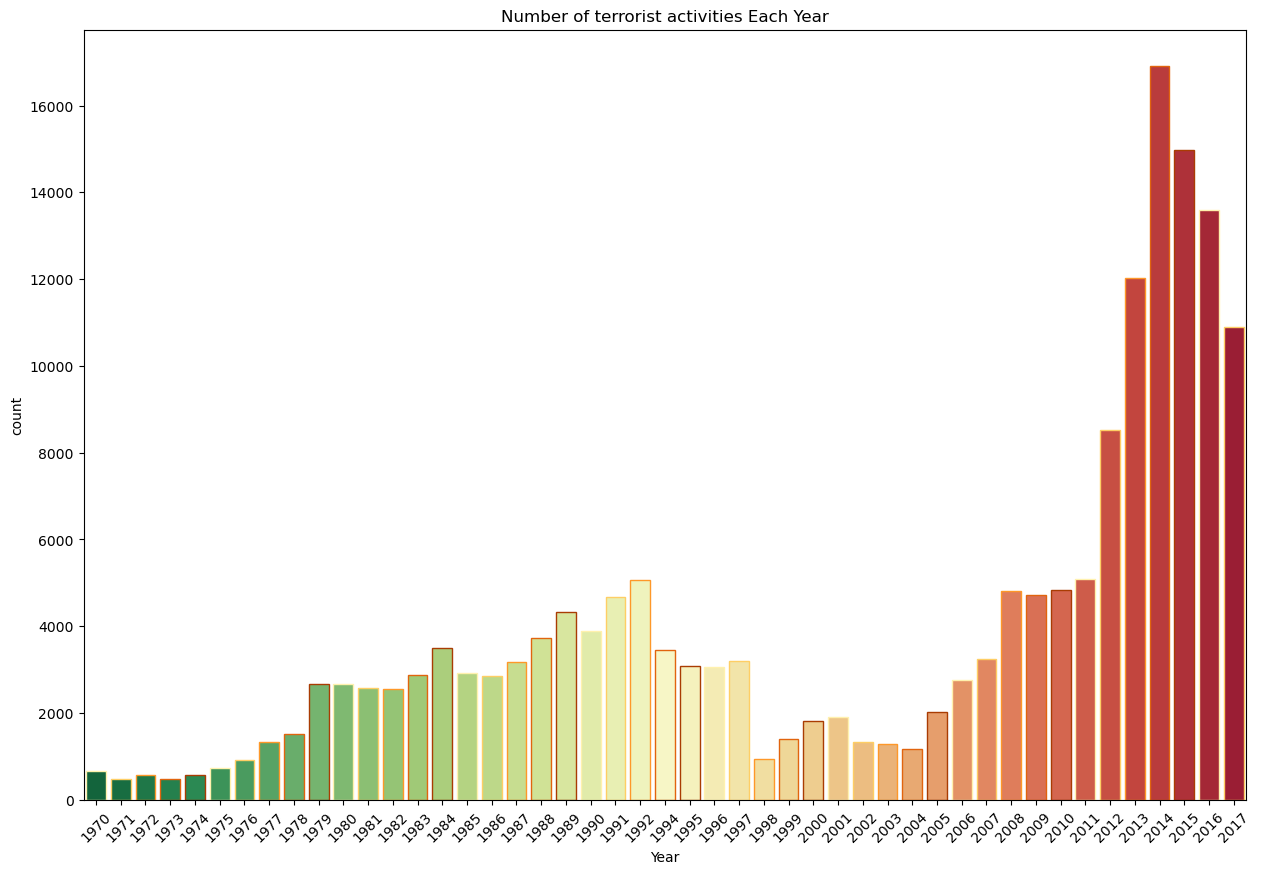

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x='Year',data=data,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr", 5))
plt.xticks(rotation = 45)
plt.title("Number of terrorist activities Each Year")
plt.show()

### Terrorist Activities by Region in each Year through Area Plot

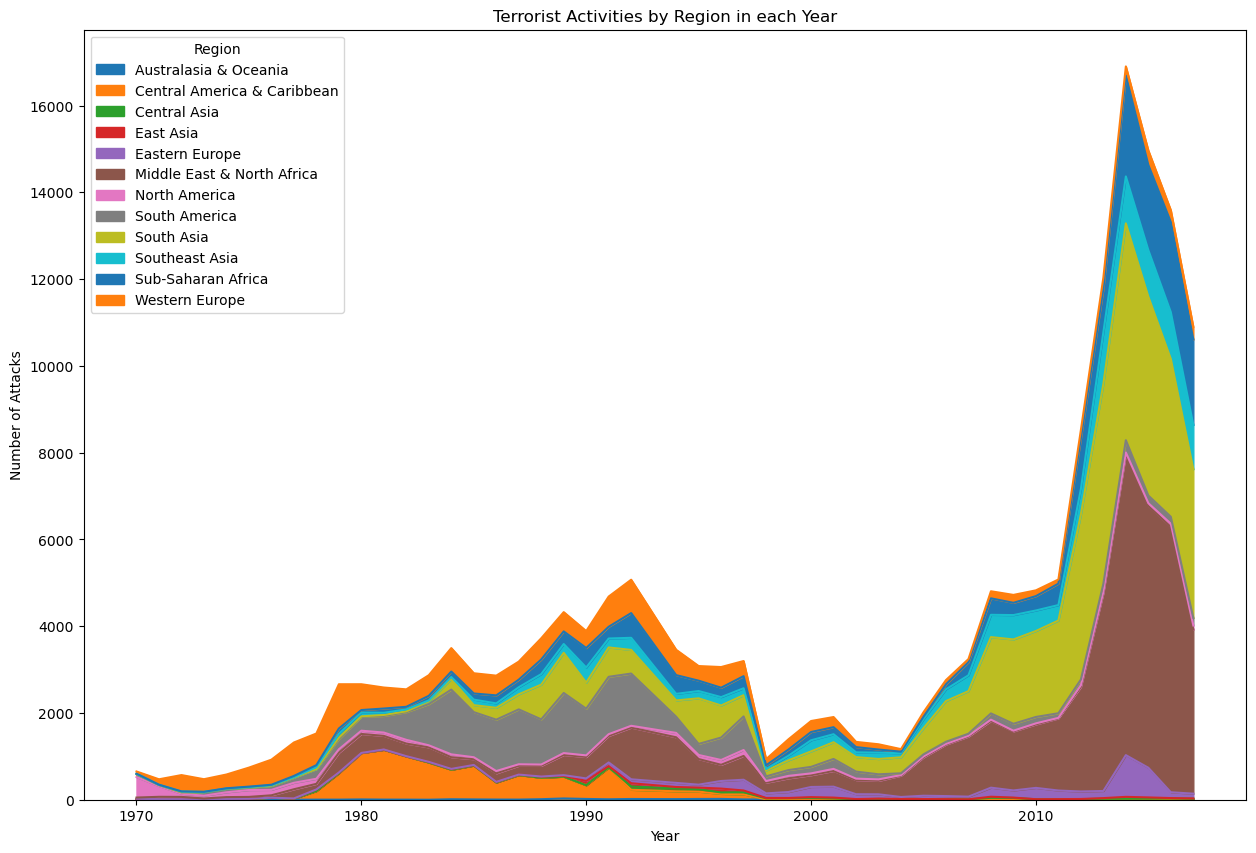

In [13]:
pd.crosstab(data.Year,data.Region).plot(kind = 'area',figsize = (15,10))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()


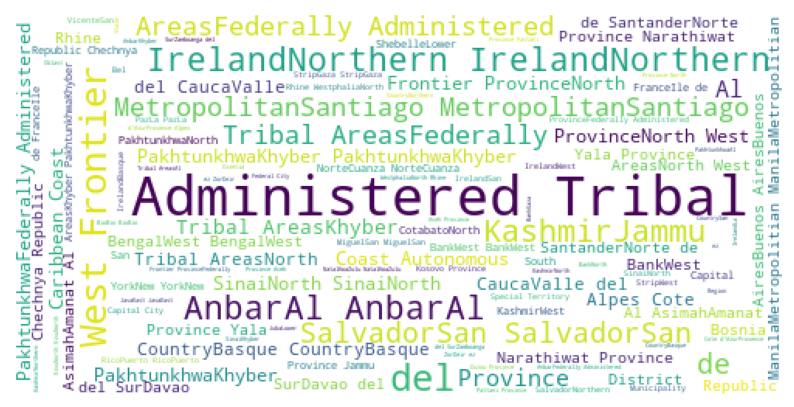

In [14]:
from wordcloud import WordCloud
from scipy import signal
cities = data['state'].dropna()
plt.subplots(figsize = (10,10))
wordcloud= WordCloud(background_color='white',width = 500, height = 250).generate(''.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [15]:
data['Wounded']=data['Wounded'].fillna(0).astype(int)
data['Killed']=data['Killed'].fillna(0).astype(int)
data['casaulties']= data['Killed'] + data['Wounded']  

In [16]:
data_copy = data.sort_values(by = 'casaulties',ascending=False)[:30]
numeric_data = data_copy.select_dtypes(include=['number'])
numeric_data.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded,casaulties
Year,1.000000,-0.032080,-0.169634,0.003728,0.150097,0.132656,-0.249850,-0.203149
Month,-0.032080,1.000000,-0.270759,0.314738,-0.398737,0.105265,0.101020,0.112755
Day,-0.169634,-0.270759,1.000000,-0.057494,0.198550,-0.171906,-0.032207,-0.062604
latitude,0.003728,0.314738,-0.057494,1.000000,-0.223085,-0.017608,0.131062,0.116579
longitude,0.150097,-0.398737,0.198550,-0.223085,1.000000,-0.196272,-0.258780,-0.274700
Killed,0.132656,0.105265,-0.171906,-0.017608,-0.196272,1.000000,0.354211,0.516918
Wounded,-0.249850,0.101020,-0.032207,0.131062,-0.258780,0.354211,1.000000,0.983632
casaulties,-0.203149,0.112755,-0.062604,0.116579,-0.274700,0.516918,0.983632,1.000000


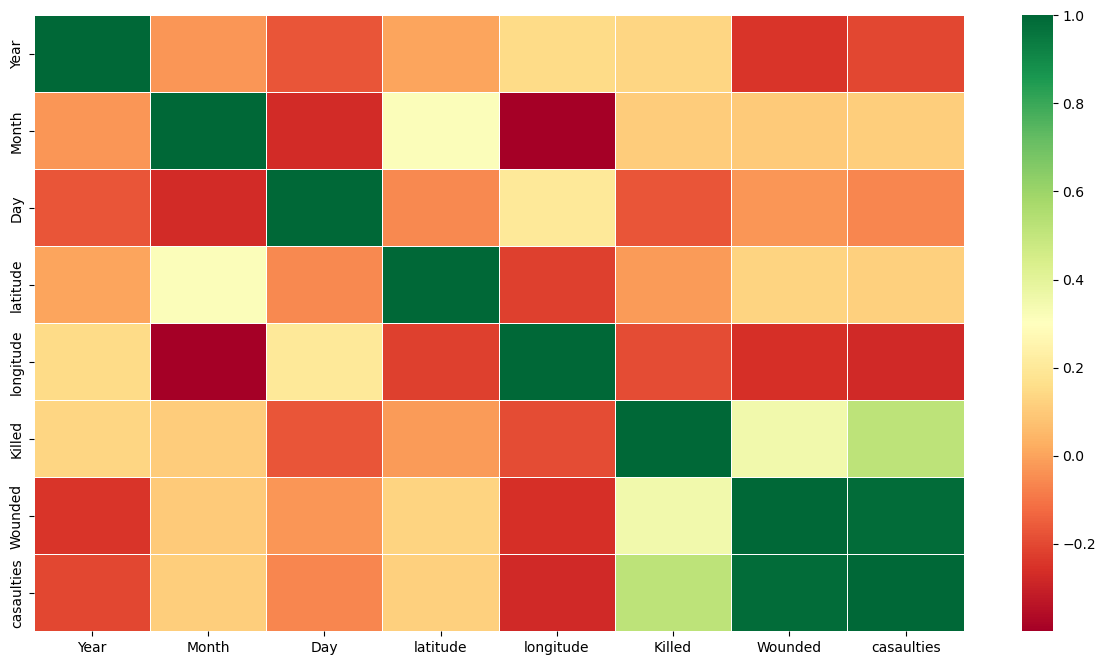

In [17]:
plt.figure(figsize=[15,8])
sns.heatmap(numeric_data.corr(),cmap='RdYlGn', linewidths=0.4)
plt.show()

In [18]:
# Most attack countries 
attack_country = data.Country.value_counts()[:15]
attack_country

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: count, dtype: int64

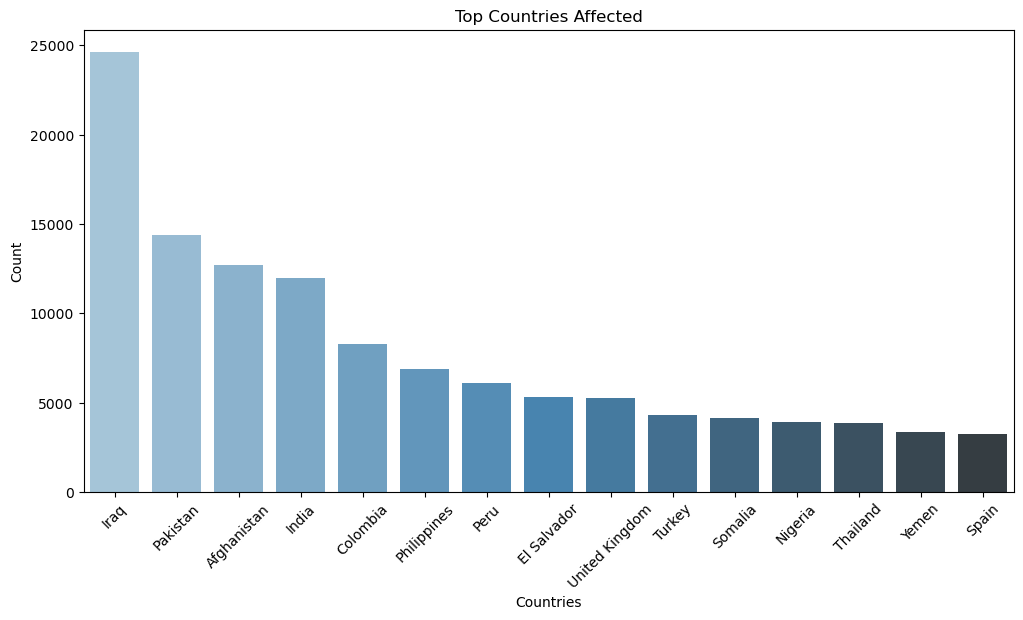

In [19]:
## Countries affected by terrorism
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_country.index,y=attack_country.values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 45)
plt.show()

In [20]:
attack_groups = data.Group.value_counts()[1:15]
attack_groups

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: count, dtype: int64

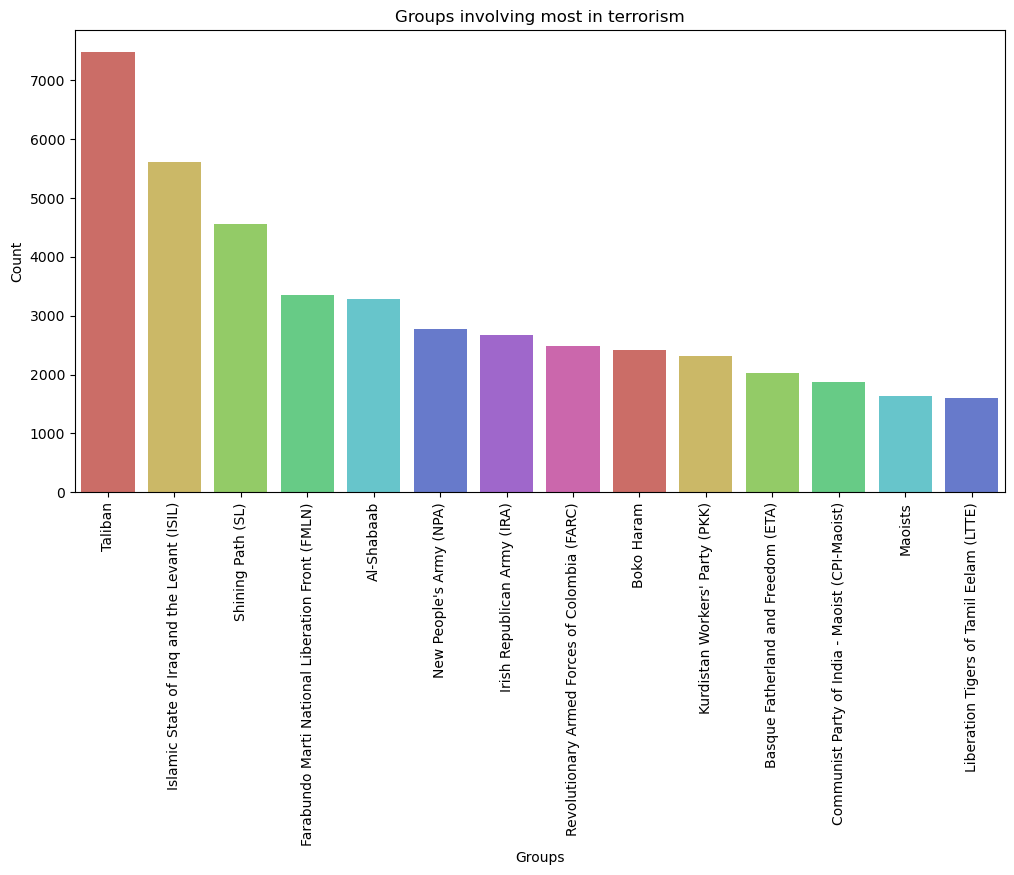

In [21]:
## Groups involving most in terrorism
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_groups.index,y=attack_groups.values,palette=sns.color_palette("hls", 8))
plt.title('Groups involving most in terrorism')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [22]:
#Terrorist group names and killed each year
group_killed= data[['Group','Killed']].groupby(['Group'],axis=0).sum().sort_values('Killed', ascending=False).head(15)
group_killed

,Killed
Group,
Unknown,112367
Islamic State of Iraq and the Levant (ISIL),38923
Taliban,29410
Boko Haram,20328
Shining Path (SL),11601
Liberation Tigers of Tamil Eelam (LTTE),10989
Al-Shabaab,9330
Farabundo Marti National Liberation Front (FMLN),8065
Nicaraguan Democratic Force (FDN),6662


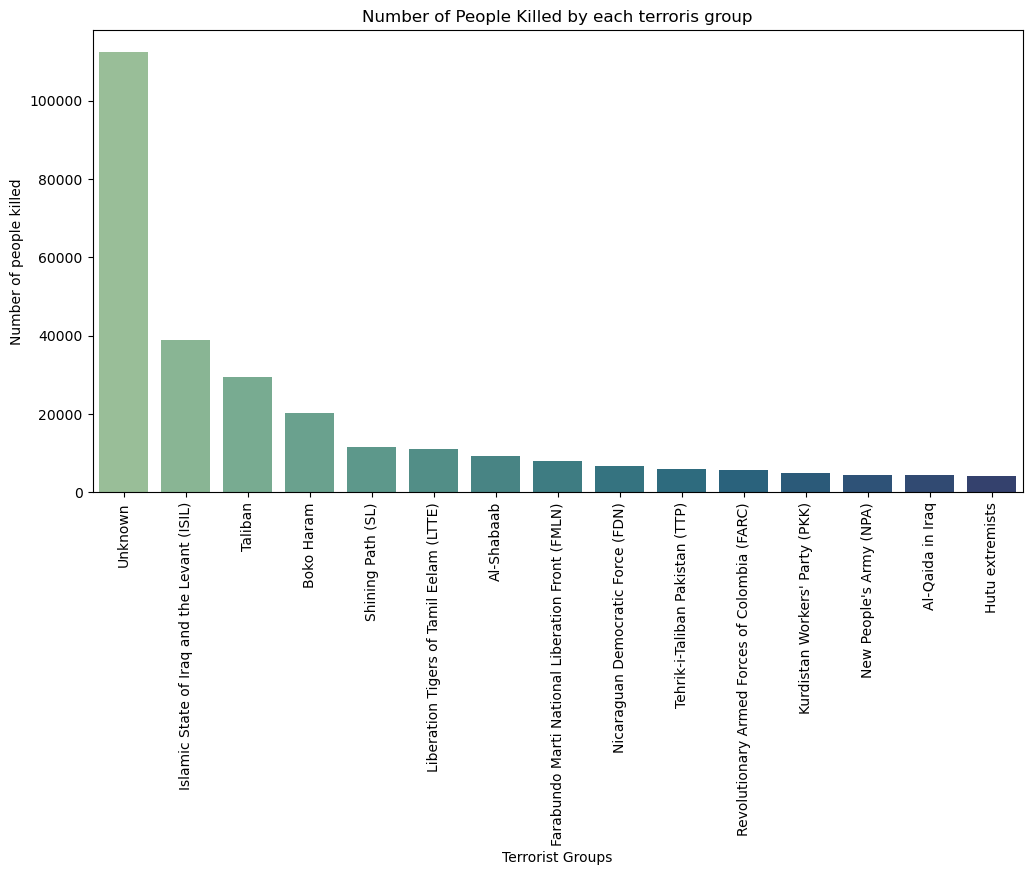

In [23]:
## People Killed by each group in terrorist activity
plt.subplots(figsize=(12,6))
sns.barplot(x=group_killed.index,y= group_killed.Killed.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

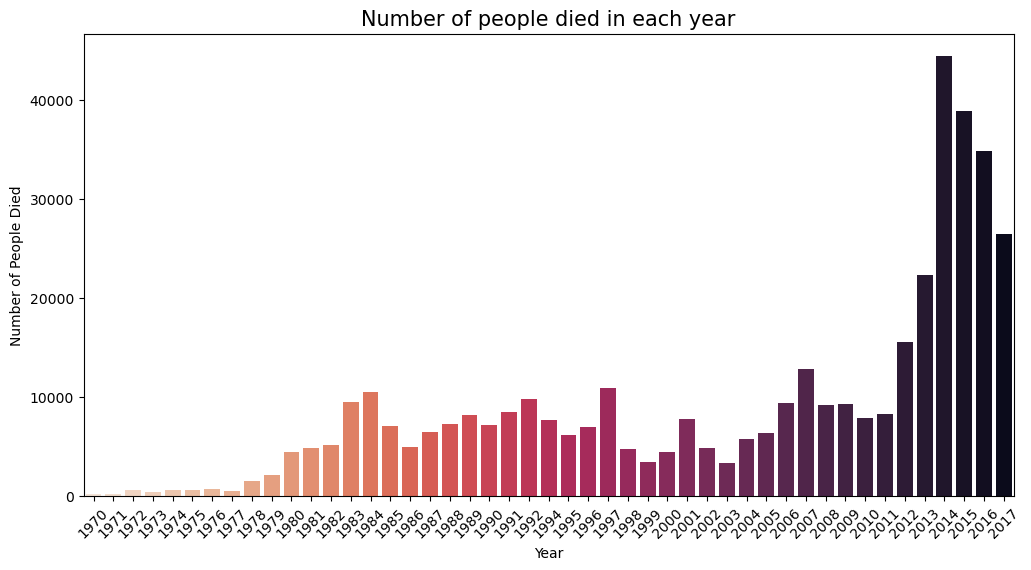

In [24]:
died_people = data[['Year','Killed']].groupby(['Year']).sum()
plt.subplots(figsize=(12,6))
sns.barplot(x=died_people.index, y=died_people.Killed.values,palette="rocket_r")
plt.title("Number of people died in each year",fontsize=15)
plt.ylabel("Number of People Died")
plt.xlabel('Year')
plt.xticks(rotation = 45)
plt.show()

In [25]:
attack_cities = data.city.value_counts()[:15]
attack_cities

city
Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: count, dtype: int64

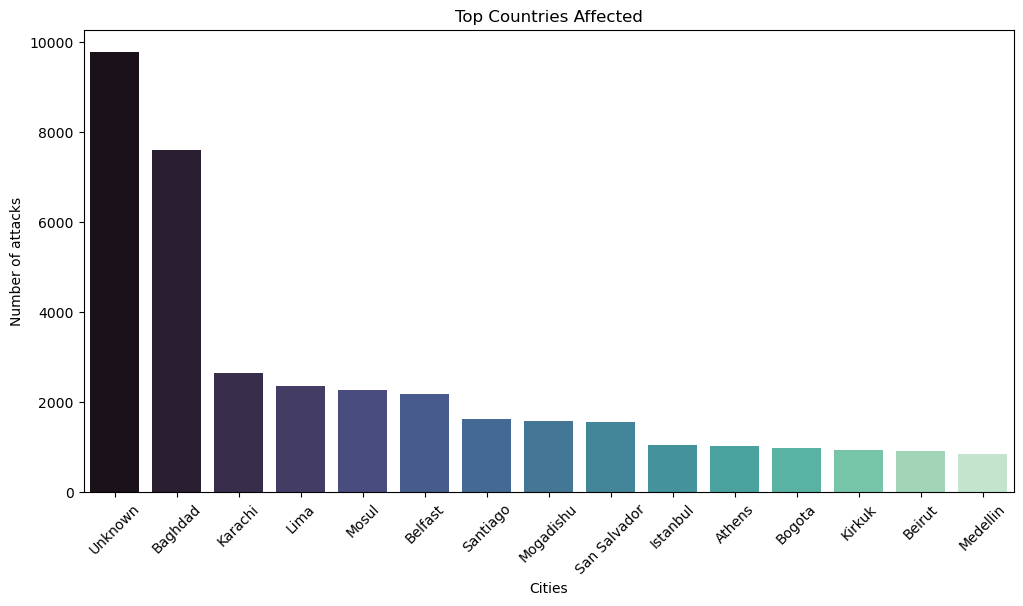

In [26]:
## Top Countries affected
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_cities.index,y=attack_cities.values,palette="mako")
plt.title('Top Countries Affected')
plt.xlabel('Cities')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 45)
plt.show()

In [27]:
attack_type = data.AttackType.value_counts()[:15]
attack_type

AttackType
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64

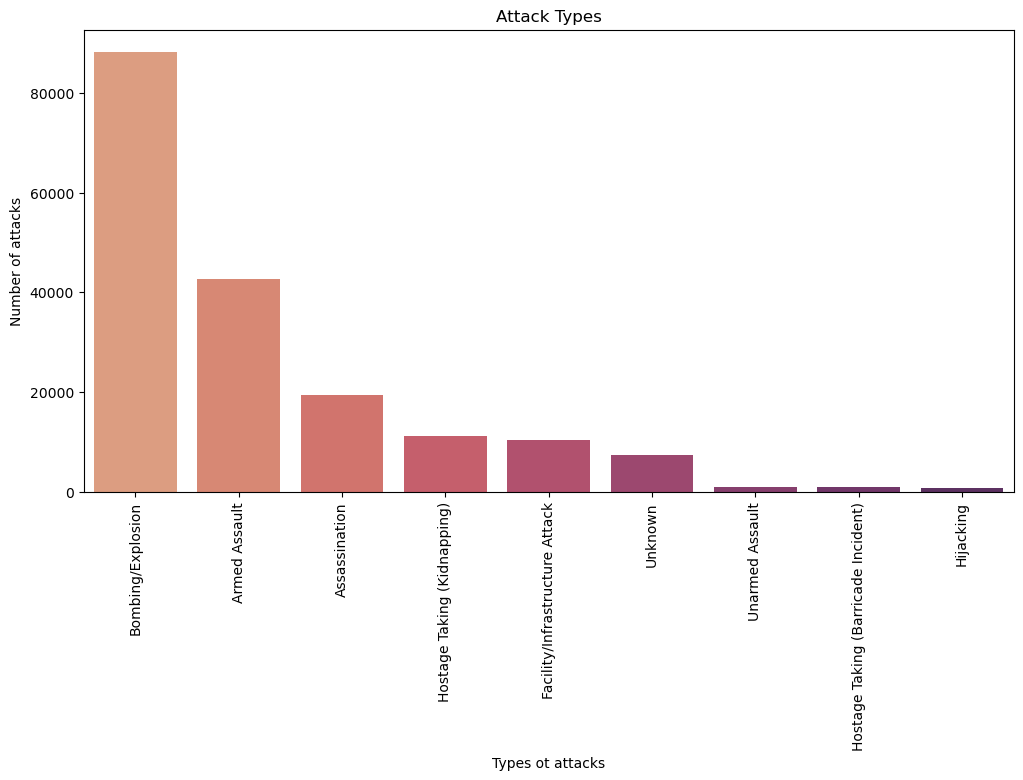

In [28]:
## Attack types 
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_type.index,y=attack_type.values,palette="flare")
plt.title('Attack Types')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of attacks')
plt.xticks(rotation= 90)
plt.show()

In [29]:
attack_killed = data[['AttackType','Killed']].groupby(["AttackType"],axis=0).sum()
attack_killed

,Killed
AttackType,
Armed Assault,160297
Assassination,24920
Bombing/Explosion,157321
Facility/Infrastructure Attack,3642
Hijacking,3718
Hostage Taking (Barricade Incident),4478
Hostage Taking (Kidnapping),24231
Unarmed Assault,880
Unknown,32381


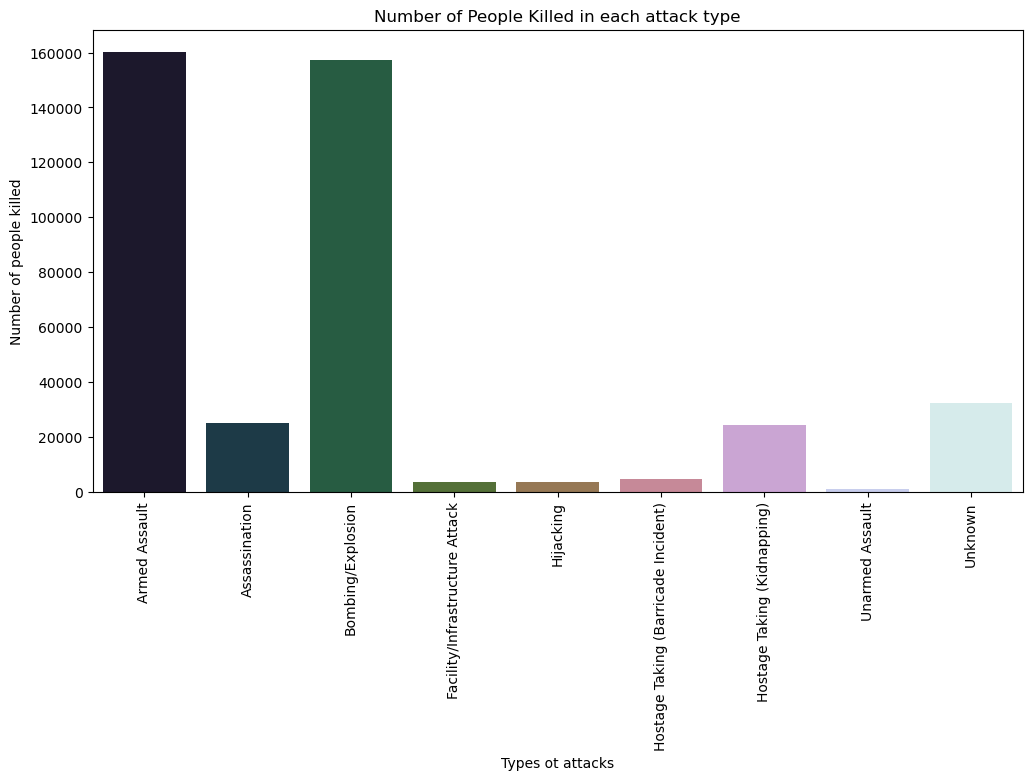

In [30]:
## People Killed in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_killed.index,y= attack_killed.Killed.values,palette="cubehelix")
plt.title('Number of People Killed in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 90)
plt.show()

In [31]:
attack_wounded = data[['AttackType','Wounded']].groupby(["AttackType"],axis=0).sum()
attack_wounded

,Wounded
AttackType,
Armed Assault,77365
Assassination,13887
Bombing/Explosion,372686
Facility/Infrastructure Attack,3765
Hijacking,17001
Hostage Taking (Barricade Incident),3966
Hostage Taking (Kidnapping),6446
Unarmed Assault,14027
Unknown,14725


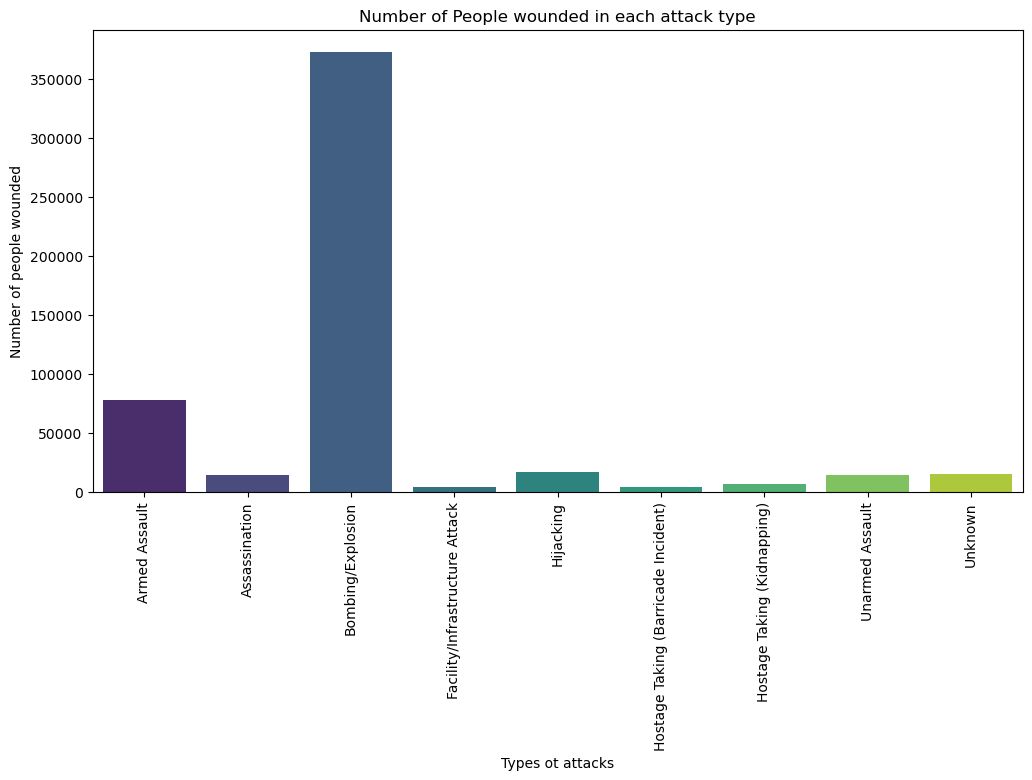

In [32]:
## People Wounded in each attack type
plt.subplots(figsize=(12,6))
sns.barplot(x=attack_wounded.index, y=attack_wounded.Wounded.values,palette="viridis")
plt.title('Number of People wounded in each attack type')
plt.xlabel('Types ot attacks')
plt.ylabel('Number of people wounded')
plt.xticks(rotation= 90)
plt.show()

Terrorist acts in the Middle East and northern Africa have been seen to have fatal consequences. The Middle East and North Africa are seen to be the places of serious terrorist attacks. In addition, even though there is a perception that Muslims are supporters of terrorism, Muslims are the people who are most damaged by terrorist attacks. If you look at the graphics, it appears that Iraq, Afghanistan and Pakistan are the most damaged countries. All of these countries are Muslim countries.

